In [ ]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
created virtual environment CPython3.10.11.final.0-64 in 308ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.7.2, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install feature_engine
!pip install flask
!pip install gunicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/stroke-prediction-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

#Importing all necessay package to analyze the data and make model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Dense, Dropout , Conv2D , GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

#Loading Dataset

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Doing EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isna().sum()   ## There is nan value in bmi column so we need to fix this

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.duplicated().sum()  # There is no duplicated values

0

In [ ]:
## Irrelevant column name from our data set which we need to delete --------> id
df.drop('id',axis=1 , inplace =True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 11)

In [ ]:
### filling nan value for bmi using mean of data 
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
df['bmi'] = si.fit_transform(df[['bmi']])

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#Checking outliers for our input features

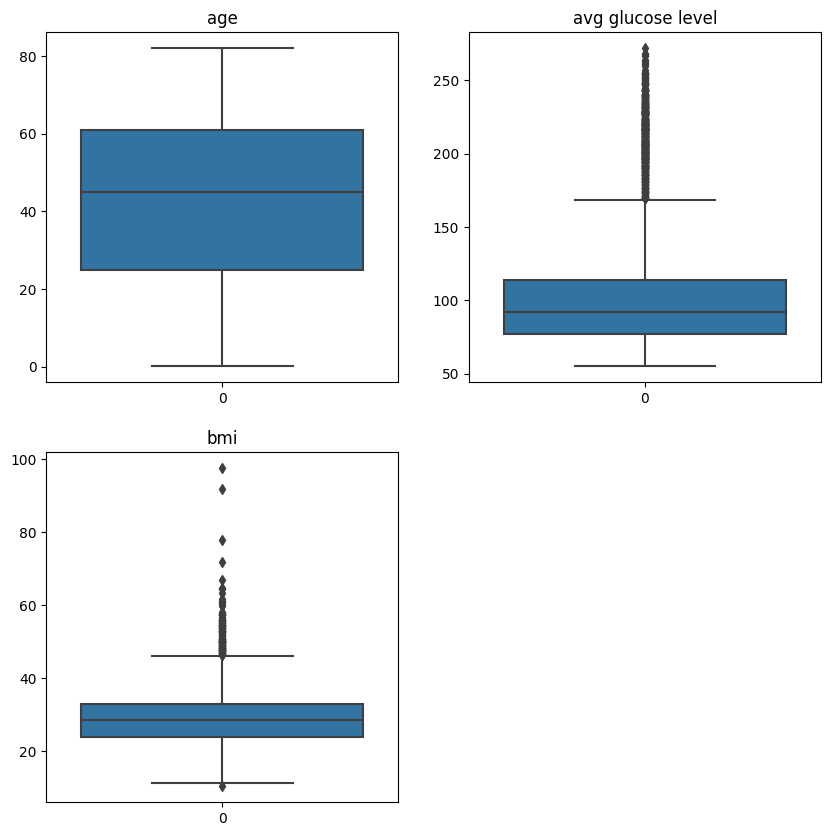

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['age'])
plt.title('age')
plt.subplot(2,2,2)
sns.boxplot(df['avg_glucose_level'])        ###   avg_glucose level and bmi have outliers so we need to investigate it
plt.title('avg glucose level')
plt.subplot(2,2,3)
sns.boxplot(df['bmi'])
plt.title('bmi')
plt.show()

In [ ]:
## For bmi column
q1_bmi = np.quantile(df['bmi'] ,0.25)
q3_bmi = np.quantile(df['bmi'] , 0.75)
iqr_bmi = q3_bmi - q1_bmi

## For avg_glucose_level column
q1_agl = np.quantile(df['avg_glucose_level'],0.25)
q3_agl = np.quantile(df['avg_glucose_level'] ,0.75)
iqr_agl = q3_agl - q1_agl

print(q1_bmi , q3_bmi ,q1_agl , q3_agl ,iqr_bmi , iqr_agl)

23.8 32.8 77.245 114.09 8.999999999999996 36.845


In [ ]:
df[(df['bmi'] < 1.5*(q1_bmi-iqr_bmi)) | (df['bmi'] > 1.5*(q3_bmi+iqr_bmi)) | (df['avg_glucose_level'] < 1.5*(q1_agl-iqr_agl)) | (df['avg_glucose_level'] > 1.5*(q1_agl+iqr_agl))]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.00,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5090,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.000000,smokes,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.400000,Unknown,0
5098,Male,9.00,0,0,No,children,Urban,71.88,17.500000,Unknown,0
5102,Female,57.00,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0


In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: xlabel='gender'>

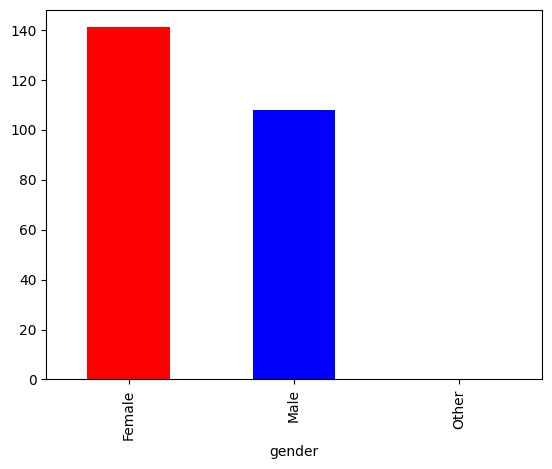

In [ ]:
df.groupby('gender')['stroke'].sum().plot(kind = 'bar' , color =['red','blue'])

In [ ]:
df[df['stroke'] ==1]  ## from above chart we can say that female suffer more stroke compared to male

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1


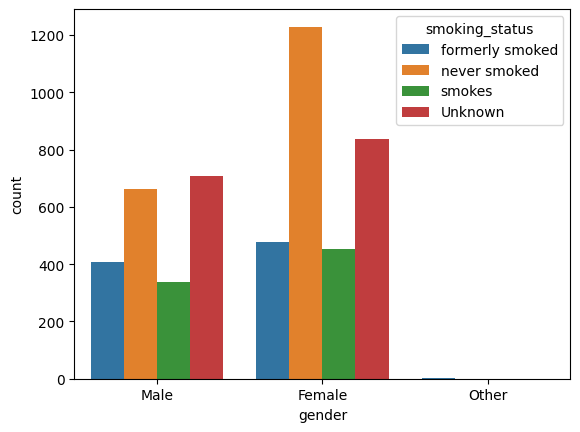

In [ ]:
sns.countplot(x ='gender' , data =df,hue ='smoking_status')  # categorize different gender on based of smoking activity
plt.show()

<Axes: xlabel='Residence_type', ylabel='count'>

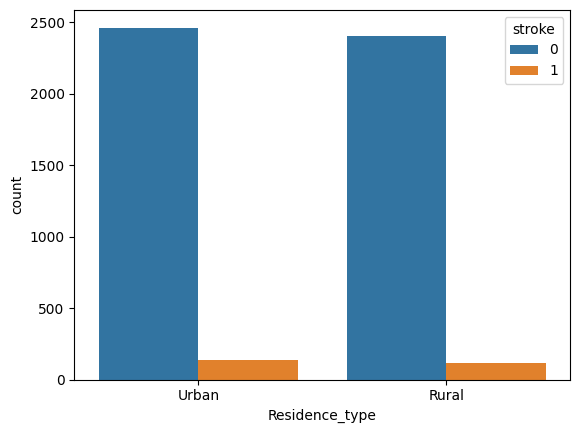

In [ ]:
sns.countplot(x ='Residence_type' , data =df,hue ='stroke')

In [ ]:
df.groupby(['Residence_type','gender'])['stroke'].sum() ## we can see her in both rural and urban condition women are more prone to stroke

Residence_type  gender
Rural           Female    64
                Male      50
                Other      0
Urban           Female    77
                Male      58
Name: stroke, dtype: int64

<Axes: xlabel='work_type', ylabel='count'>

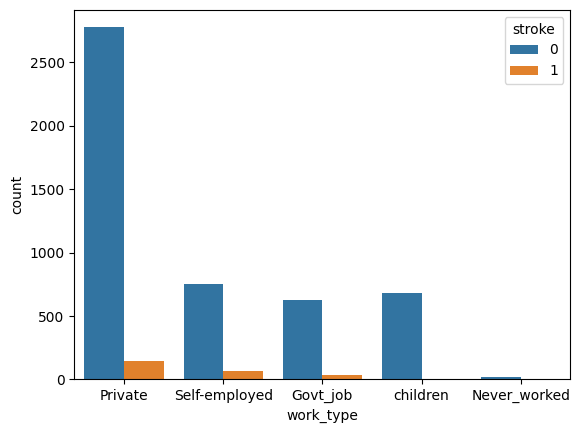

In [ ]:
sns.countplot(x ='work_type' , data =df,hue ='stroke')

In [ ]:
df.groupby(['work_type'])['stroke'].sum()  ## sequence of pattern for stroke as per job type is ---> private--->self imployed--->gov--->children--->unemployed

work_type
Govt_job          33
Never_worked       0
Private          149
Self-employed     65
children           2
Name: stroke, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

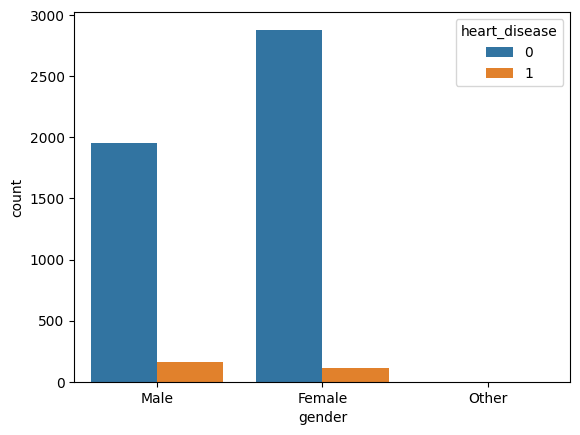

In [ ]:
sns.countplot(x ='gender' , data =df,hue ='heart_disease')  ## Males with heart disease are prone to more stroke

<Axes: xlabel='ever_married', ylabel='count'>

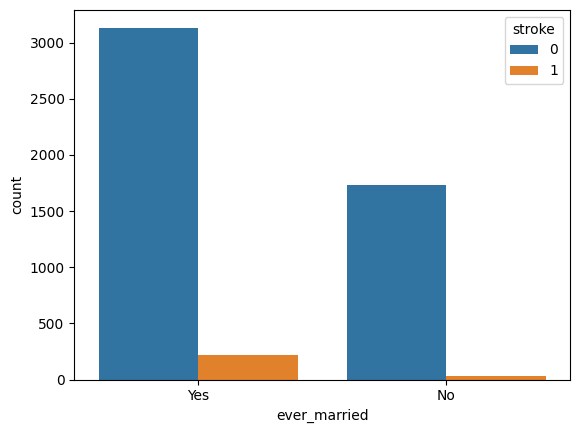

In [ ]:
sns.countplot(x ='ever_married' , data =df,hue ='stroke')  ## people who are married are prone to stroke more as compared to unmarried

In [ ]:
df.groupby('ever_married')['stroke'].sum()

ever_married
No      29
Yes    220
Name: stroke, dtype: int64

## Encoding of text data to number

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
for i in df.columns:
  if type(i) == str:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [ ]:
x = df.iloc[:,:-1]
x
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
x =pd.DataFrame(x,columns = df.columns[:-1])
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,1
1,0,82,0,0,1,3,0,3588,162,2
2,1,101,0,1,1,2,0,2483,199,2
3,0,70,0,0,1,2,1,3385,218,3
4,0,100,1,0,1,3,0,3394,113,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [ ]:
y.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

## Standardizing input data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
x =pd.DataFrame(x,columns = df.columns[:-1])
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.441373,0.569605,-0.299647,4.412184,0.62088,0.036794,1.220503,1.449541,1.129497,-0.269562
1,-0.693133,0.295353,-0.299647,-0.226645,0.62088,1.067655,-0.819334,1.231631,-0.084427,0.764645
2,1.441373,1.163817,-0.299647,4.412184,0.62088,0.036794,-0.819334,0.312584,0.491409,0.764645
3,-0.693133,-0.253151,-0.299647,-0.226645,0.62088,0.036794,1.220503,1.062792,0.787108,1.798851
4,-0.693133,1.118108,3.337264,-0.226645,0.62088,1.067655,-0.819334,1.070278,-0.847021,0.764645


Splitting data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state =0)

## Making ANN Model

In [ ]:
from keras.models import Sequential

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(32 , activation = 'relu' , input_dim = 10 , kernel_initializer = 'he_uniform'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1,activation='sigmoid'))
ann_model.compile(optimizer ='adam' ,loss='binary_crossentropy' , metrics =['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


## Training ANN Model

In [ ]:
ann_model.fit(x_train , y_train , validation_data =(x_test ,y_test),epochs =100 ,batch_size=20)

Epoch 1/100
389/389 [==============================] - 4s 5ms/step - loss: 0.5974 - accuracy: 0.6863 - val_loss: 0.4376 - val_accuracy: 0.8134
Epoch 2/100
389/389 [==============================] - 3s 7ms/step - loss: 0.4476 - accuracy: 0.7927 - val_loss: 0.4034 - val_accuracy: 0.8201
Epoch 3/100
389/389 [==============================] - 2s 6ms/step - loss: 0.4227 - accuracy: 0.8078 - val_loss: 0.3920 - val_accuracy: 0.8252
Epoch 4/100
389/389 [==============================] - 2s 5ms/step - loss: 0.4078 - accuracy: 0.8157 - val_loss: 0.3847 - val_accuracy: 0.8272
Epoch 5/100
389/389 [==============================] - 2s 6ms/step - loss: 0.4009 - accuracy: 0.8196 - val_loss: 0.3788 - val_accuracy: 0.8278
Epoch 6/100
389/389 [==============================] - 3s 8ms/step - loss: 0.3913 - accuracy: 0.8242 - val_loss: 0.3719 - val_accuracy: 0.8319
Epoch 7/100
389/389 [==============================] - 3s 8ms/step - loss: 0.3881 - accuracy: 0.8268 - val_loss: 0.3674 - val_accuracy: 0.8360

## Doing HyperParameter Tuning of ANN model to get better result

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras_tuner as kt

In [ ]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
6075,-0.693133,-0.435986,-0.299647,-0.226645,-1.610616,0.036794,-0.819334,-0.164821,0.102331,-0.269562
5221,-0.693133,-0.207443,-0.299647,-0.226645,0.620880,0.036794,-0.819334,1.047822,0.226836,-0.269562
7390,-0.693133,1.209526,-0.299647,-0.226645,0.620880,0.036794,-0.819334,1.111864,-0.162243,-0.269562
1761,1.441373,0.341061,-0.299647,-0.226645,0.620880,1.067655,1.220503,-0.550738,1.082808,-0.269562
2470,-0.693133,-0.207443,-0.299647,-0.226645,0.620880,1.067655,-0.819334,-0.563214,-0.364563,0.764645
...,...,...,...,...,...,...,...,...,...,...
7891,-0.693133,0.798148,-0.299647,-0.226645,0.620880,-0.994067,-0.819334,1.395479,0.055641,0.764645
9225,-0.693133,0.843857,-0.299647,-0.226645,0.620880,0.036794,1.220503,1.392152,-0.395690,-0.269562
4859,1.441373,-0.527403,-0.299647,-0.226645,0.620880,0.036794,-0.819334,-1.399089,0.787108,-1.303768
3264,-0.693133,0.295353,-0.299647,-0.226645,0.620880,0.036794,-0.819334,-1.186170,-0.535758,-0.269562


In [ ]:
def build_in(hp):
  model= Sequential()
  counter =0 
  for i in range(hp.Int('num_layers' , min_value = 1, max_value = 10)):
    if counter == 0:
      model.add(Dense(units = hp.Int('units'+str(i),min_value=10 , max_value = 128 , step =1),
                activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid','elu','LeakyReLU']),
                kernel_initializer=hp.Choice('ki'+str(i),values = ['glorot_normal','glorot_uniform','he_uniform','he_normal']),
                input_dim =10))
      model.add(Dropout(hp.Choice('dropout'+str(i),values =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(Dense(units = hp.Int('units'+str(i),min_value=10 , max_value = 128 , step =1),
              activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid','elu','LeakyReLU']),
              kernel_initializer=hp.Choice('ki'+str(i),values = ['glorot_normal','glorot_uniform','he_uniform','he_normal']),
              input_dim =10))
      model.add(Dropout(hp.Choice('dropout'+str(i),values =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',values = ['adam','rmsprop','adadelta']),loss = 'binary_crossentropy',metrics = ['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_in , objective= 'val_accuracy' , max_trials =10 , directory ='mydir' ,project_name='stroke_prediction')

In [ ]:
tuner.search(x_train , y_train , validation_data =(x_test,y_test) , epochs =30)

In [ ]:
tuner.get_best_hyperparameters()[0].values  ## To see best hyperparameter got from keras tuner

{'num_layers': 4,
 'units0': 77,
 'activation0': 'tanh',
 'ki0': 'glorot_normal',
 'dropout0': 0.5,
 'optimizer': 'adam',
 'units1': 112,
 'activation1': 'LeakyReLU',
 'ki1': 'glorot_uniform',
 'dropout1': 0.7,
 'units2': 98,
 'activation2': 'tanh',
 'ki2': 'he_normal',
 'dropout2': 0.3,
 'units3': 17,
 'activation3': 'elu',
 'ki3': 'glorot_uniform',
 'dropout3': 0.4,
 'units4': 119,
 'activation4': 'sigmoid',
 'ki4': 'he_uniform',
 'dropout4': 0.8,
 'units5': 43,
 'activation5': 'elu',
 'ki5': 'glorot_uniform',
 'dropout5': 0.4,
 'units6': 90,
 'activation6': 'elu',
 'ki6': 'he_normal',
 'dropout6': 0.2,
 'units7': 112,
 'activation7': 'elu',
 'ki7': 'glorot_uniform',
 'dropout7': 0.9,
 'units8': 122,
 'activation8': 'relu',
 'ki8': 'he_normal',
 'dropout8': 0.5}

In [ ]:
## Form above we can say that our inital model was best so we will consider that

## Making Machine Learning model

In [ ]:
##Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr.score(x_train,y_train)

0.817024559598817

In [ ]:
ypred = lr.predict(x_test)

In [ ]:
lr.score(x_test,y_test)

0.8118251928020566

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test , ypred)
acc

0.8118251928020566

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test , ypred)

In [ ]:
cm

array([[762, 211],
       [155, 817]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(cm,display_labels=lr.classes_)

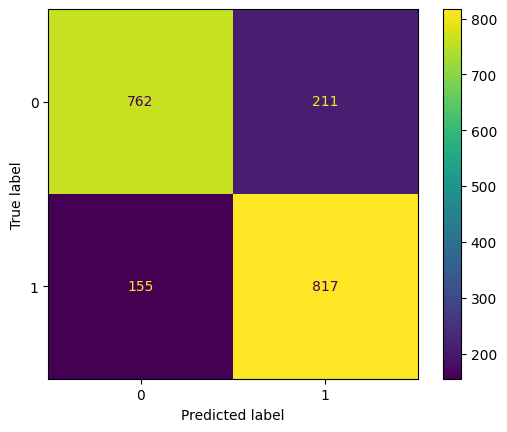

In [ ]:
display.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_lr = cross_val_score(lr ,x,y,cv =5)
cv_lr = np.mean(cv_lr)
cv_lr

0.8152665376030128

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,max_depth =15)

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=15)

In [ ]:
rfc.score(x_train , y_train)

0.9805837726629806

In [ ]:
rfc.score(x_test ,y_test)

0.9377892030848329

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test , y_pred)

In [ ]:
cm2

array([[890,  83],
       [ 40, 932]])

In [ ]:
acc2 = accuracy_score(y_test , y_pred)

In [ ]:
acc2

0.9367609254498714

In [ ]:
from sklearn.model_selection import cross_val_score
cv_rf = cross_val_score(rfc ,x,y,cv =5)
cv_rf = np.mean(cv_rf)
cv_rf

0.9261499888920625

### By comparing all model we can say that RandomForest Classifier is best with Test Accuracy of 93.77% and Cross val score of 92.61% 

Importing pickle file

In [ ]:
import pickle

In [ ]:
with open('randomforest.pkl','wb') as file:
  pickle.dump(rfc,file)

In [ ]:
!pip freeze > requirements.txt